In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
alpha_m = lambda u: (2.5 - 0.1 * (u + 65)) / (np.exp(2.5 - 0.1 * (u + 65)) - 1)
alpha_n = lambda u: (0.1 - 0.01 * (u + 65)) / (np.exp(1 - 0.1 * (u + 65)) - 1)
alpha_h = lambda u: (0.07 * np.exp((-u - 65) / 20))
beta_m = lambda u: 4 * np.exp((-u - 65) / 18)
beta_n = lambda u: 0.125 * np.exp((-u - 65) / 80)
beta_h = lambda u: 1 / (np.exp(3 - 0.1 * (u + 65)) + 1)

In [3]:
def dmdu(u, m):
    dmdt = alpha_m(u) * (1 - m) - beta_m(u) * m
    return dmdt
def dndu(u, n):
    dndt = alpha_n(u) * (1 - n) - beta_n(u) * n
    return dndt
def dhdu(u, h):
    dhdt = alpha_h(u) * (1 - h) - beta_h(u) * h
    return dhdt
def dudt(u, m, n, h, I=0):
    g_Na = 120
    g_K = 36
    g_L = 0.3
    E_Na = 50 
    E_K = 142
    E_L = -54.4
    C = 0.5
    dudt = (g_Na * (E_Na - u) * m**3 * h \
               + g_K  * (E_K - u) *  n**4 \
               + g_L  * (E_L - u) + I) / C
    return dudt

In [4]:
ssvm = lambda u: alpha_m(u) / (alpha_m(u) + beta_m(u))
ssvn = lambda u: alpha_n(u) / (alpha_n(u) + beta_n(u))
ssvh = lambda u: alpha_h(u) / (alpha_h(u) + beta_h(u))

Text(0.5,1,'Steady state values of gating variables')

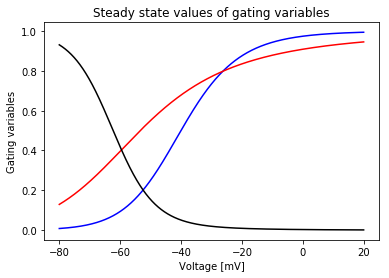

In [5]:
volts = np.arange(-80, 20, 0.001)
ssv_m = np.empty_like(volts)
ssv_n = np.empty_like(volts)
ssv_h = np.empty_like(volts)
for i in range(len(volts)):
    ssv_m[i] = ssvm(volts[i])
    ssv_n[i] = ssvn(volts[i])
    ssv_h[i] = ssvh(volts[i])
    
plt.figure()
plt.plot(volts, ssv_m, 'b')
plt.plot(volts, ssv_n, 'r')
plt.plot(volts, ssv_h, 'k')
plt.xlabel('Voltage [mV]')
plt.ylabel('Gating variables')
plt.title('Steady state values of gating variables')

In [6]:
tt = np.arange(0, 50, 0.001)
u = np.zeros_like(tt)
m = np.zeros_like(tt)
n = np.zeros_like(tt)
h = np.zeros_like(tt)
u = -65
m[0] = ssvm(u)
n[0] = ssvn(u)
h[0] = ssvh(u)

for t in range(1, len(tt)):
        dt = tt[t] - tt[t-1]
        dm = dmdu(u, m[t-1])
        dn = dndu(u, n[t-1])
        dh = dhdu(u, h[t-1])
        h[t] = h[t-1] + dt * dh
        m[t] = m[t-1] + dt * dm
        n[t] = n[t-1] + dt * dn

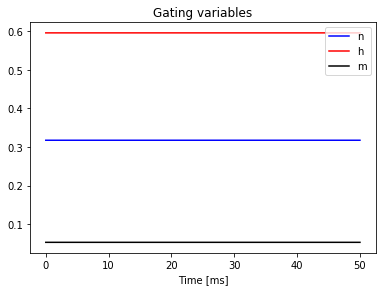

In [7]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(tt, n, 'b', label='n')
axes.plot(tt, h, 'r', label='h')
axes.plot(tt, m, 'k', label='m')
axes.set_xlabel('Time [ms]')
axes.set_title('Gating variables')
axes.legend()


In [10]:
tt = np.arange(0, 50, 0.001)
u = np.zeros_like(tt)
m = np.zeros_like(tt)
n = np.zeros_like(tt)
h = np.zeros_like(tt)
u = -65 * np.ones_like(tt)
u[tt >= 20] = 0
u[tt >= 40] = -65
m[0] = ssvm(u[0])
n[0] = ssvn(u[0])
h[0] = ssvh(u[0])

for t in range(1, len(tt)):
        dt = tt[t] - tt[t-1]
        dm = dmdu(u[t-1], m[t-1])
        dn = dndu(u[t-1], n[t-1])
        dh = dhdu(u[t-1], h[t-1])
        h[t] = h[t-1] + dt * dh
        m[t] = m[t-1] + dt * dm
        n[t] = n[t-1] + dt * dn

cond_Na = np.multiply(m**3, h)
cond_K = n**4

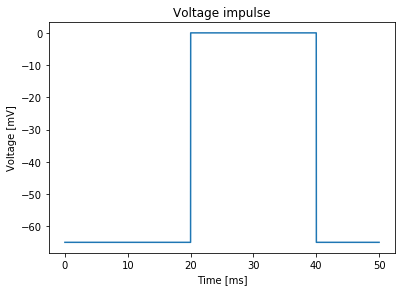

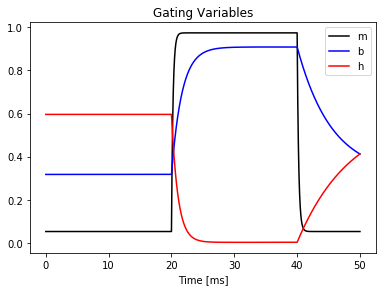

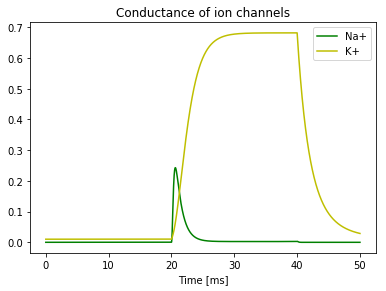

In [11]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(tt, u)
axes.set_xlabel('Time [ms]')
axes.set_ylabel('Voltage [mV]')
axes.set_title('Voltage impulse')
axes.legend()
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(tt, m, 'k', label='m')
axes.plot(tt, n, 'b', label='b')
axes.plot(tt, h, 'r', label='h')
axes.set_xlabel('Time [ms]')
axes.set_title('Gating Variables')
axes.legend()
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])
axes.plot(tt, cond_Na, 'g', label='Na+')
axes.plot(tt, cond_K, 'y', label='K+')
axes.set_xlabel('Time [ms]')
axes.set_title('Conductance of ion channels')
axes.legend()